In [1]:
#Biosignal analysis using Support Vector Machine algorithm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
from datetime import timedelta

from mpl_toolkits.mplot3d import Axes3D

import biosppy

import seaborn as sns

import os

import sklearn.linear_model
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm


from collections import defaultdict

In [2]:
train_df = pd.read_csv("train_data_features_clean.csv")
test_df = pd.read_csv("test_data_features_clean.csv")


In [3]:
x_train = train_df.iloc[:, 7:]
y_train = train_df.iloc[:, 6]

x_test = test_df.iloc[:, 7:]
y_test = test_df.iloc[:, 6]

print("The shape of x_train is:", x_train.shape)
print("The shape of y_train is:", y_train.shape)

print("The shape of x_test is:", x_test.shape)
print("The shape of y_test is:", y_test.shape)

The shape of x_train is: (2068, 359)
The shape of y_train is: (2068,)
The shape of x_test is: (518, 359)
The shape of y_test is: (518,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)

scaler.fit_transform(x_train)
scaler.fit_transform(x_test)

array([[ 0.38063676, -0.26981906, -0.05137572, ..., -0.22638954,
        -0.3608573 ,  0.85324066],
       [-0.32451855,  0.35903373, -0.08606522, ...,  0.4099376 ,
        -1.73006981,  0.10979035],
       [-0.4539826 , -0.43023939, -0.17436007, ...,  1.44066235,
         0.08923576,  0.80289601],
       ...,
       [-0.33391494, -0.40742493, -0.27583858, ...,  0.38287934,
         0.15503299, -1.71841237],
       [-0.40677594,  0.06750741, -0.20907562, ..., -0.12292554,
        -0.03052264,  1.06188105],
       [-0.44856647, -0.03407217, -0.22244825, ..., -0.27499323,
         0.6544364 , -1.61366741]])

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10],
             'kernel': ['rbf', 'poly']}

svm_classifier = svm.SVC()

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(x_train, y_train)

print("Best paprameters for this techinique are:", grid_search.best_params_)

y_pred = grid_search.predict(x_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
    
print("Accuracy is: ", accuracy) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best paprameters for this techinique are: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

    baseline       0.83      0.91      0.87        11
 gesticulate       0.96      1.00      0.98        25
   greetings       1.00      0.82      0.90        11
       jumps       1.00      1.00      1.00         2
        lift       0.94      1.00      0.97        16
         run       0.99      0.99      0.99       357
  walk_after       0.95      0.93      0.94        44
 walk_before       0.98      0.96      0.97        52

    accuracy                           0.98       518
   macro avg       0.96      0.95      0.95       518
weighted avg       0.98      0.98      0.98       518

Accuracy is:  0.9768339768339769


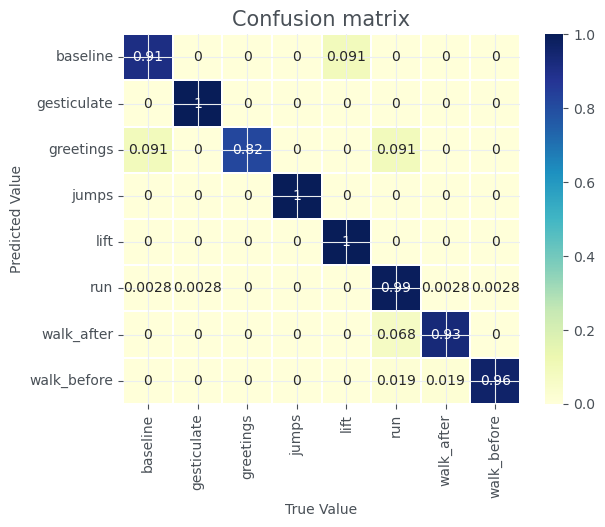

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cm, annot=True, xticklabels = grid_search.classes_, yticklabels = grid_search.classes_, linewidths=0.1,  cmap = 'YlGnBu')

plt.title("Confusion matrix", fontsize = 15)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.savefig("Confusion_Matrix_SVM")
plt.show()

#Document created by Dushyanth Sirivolu for final project for Erdos Boot Camp Spring 2024  